# Homework 7
## Jacob Traunero
### Problem 1

a) See attached written section.

b)

In [0]:
import numpy as np
import matplotlib.pyplot as plot
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
from tabulate import tabulate

In [0]:
def interp_monomials(xs,ys):
  vMatrix = np.zeros((len(xs),len(xs)))
  for countA, x in enumerate(xs):
    for count, _ in enumerate(xs):
      vMatrix[countA][count] = x**count
  return vMatrix, np.flip(np.linalg.solve(vMatrix,ys), axis=0)

c)

In [0]:
def homeworkFunc(x):
  return 1/(1+25*x**2)

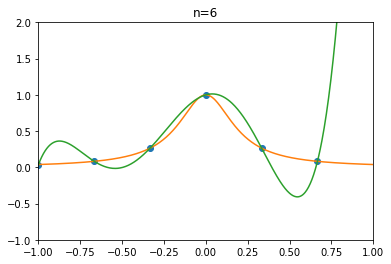

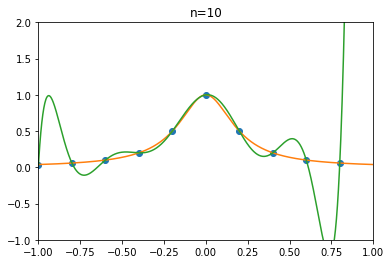

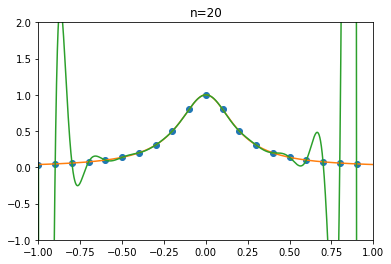

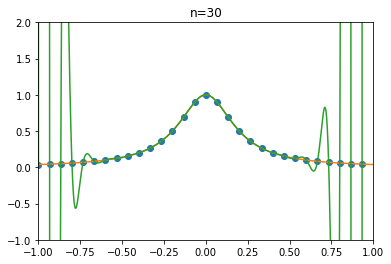

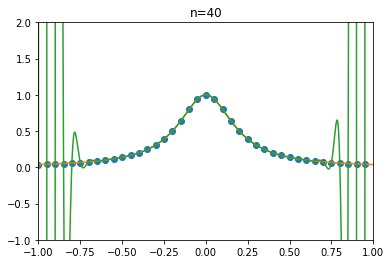

In [0]:
ns = [i*2 for i in range(1,100)]
ns_fine = [n*100 for n in ns]

xss_fine = [[-1+2*i/n for i in range(0,n)] for n in ns_fine]
yss_fine = [[homeworkFunc(x)for x in xs] for xs in xss_fine]

xss = [[-1+2*i/n for i in range(0,n)] for n in ns]
yss = [[homeworkFunc(x) for x in xs] for xs in xss]

interpolated_coeff = [interp_monomials(xs,ys)[1] for xs,ys in zip(xss,yss)]

interpolated_yss = [np.polyval(coeff, xs) for coeff,xs in zip(interpolated_coeff,xss_fine)]

plot.plot(xss[2], yss[2], 'o')
plot.plot(xss_fine[2], yss_fine[2])
plot.plot(xss_fine[2], interpolated_yss[2])
plot.axis([-1, 1, -1, 2])
plot.title("n=6")
plot.show()

plot.plot(xss[4], yss[4], 'o')
plot.plot(xss_fine[4], yss_fine[4])
plot.plot(xss_fine[4], interpolated_yss[4])
plot.axis([-1, 1, -1, 2])
plot.title("n=10")
plot.show()

plot.plot(xss[9], yss[9], 'o')
plot.plot(xss_fine[9], yss_fine[9])
plot.plot(xss_fine[9], interpolated_yss[9])
plot.axis([-1, 1, -1, 2])
plot.title("n=20")
plot.show()

plot.plot(xss[14], yss[14], 'o')
plot.plot(xss_fine[14], yss_fine[14])
plot.plot(xss_fine[14], interpolated_yss[14])
plot.axis([-1, 1, -1, 2])
plot.title("n=30")
plot.show()

plot.plot(xss[19], yss[19], 'o')
plot.plot(xss_fine[19], yss_fine[19])
plot.plot(xss_fine[19], interpolated_yss[19])
plot.axis([-1, 1, -1, 2])
plot.title("n=40")
plot.show()




In [0]:
condition_num = np.linalg.cond(interp_monomials(xss[19],yss[19])[0])
print("The condition number at n=40 is", condition_num)

The condition number at n=40 is 6.644362627182526e+18


I could never get to a point where the polynomial does not interpolate. However, the larger values of n do lead to larger error values near -1 and 1. However, I did find the condition number of the V matrix at n=40 (shown above). This shows that the matrix is extremely ill-conditioned.


### Question 2



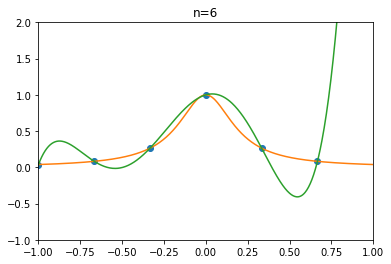

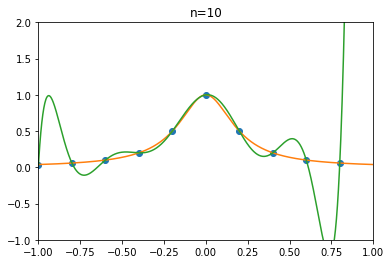

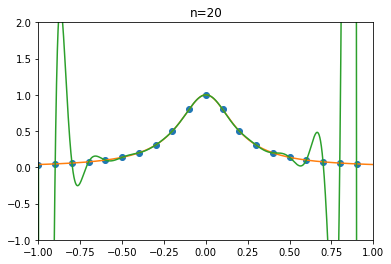

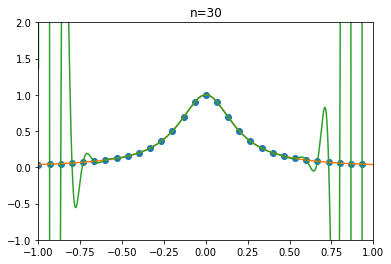

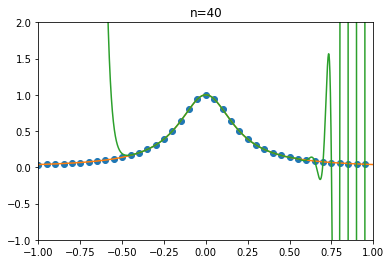

In [0]:
def plot_lagrange(n):
  i = int(n/2 -1)
  poly = lagrange(xss[i],yss[i])
  coef = Polynomial(poly).coef
  lagrange_ys = np.polyval(coef,xss_fine[i])

  plot.plot(xss[i], yss[i], 'o')
  plot.plot(xss_fine[i], yss_fine[i])
  plot.plot(xss_fine[i], lagrange_ys)
  plot.axis([-1, 1, -1, 2])
  plot.title("n={}".format(n))
  plot.show()
  
plot_lagrange(6)
plot_lagrange(10)
plot_lagrange(20)
plot_lagrange(30)
plot_lagrange(40)

Lagrange interpolation seems to have the same isus that the monomial interpolation has. However, lagrange seems worse when n is very large.

###Question 3

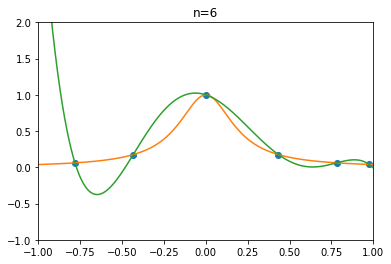

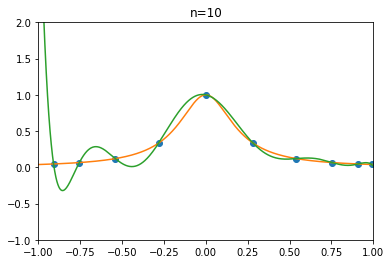

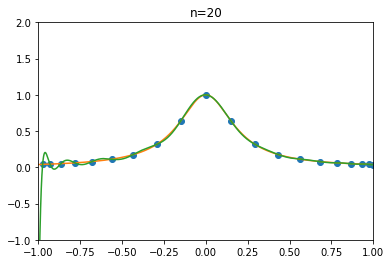

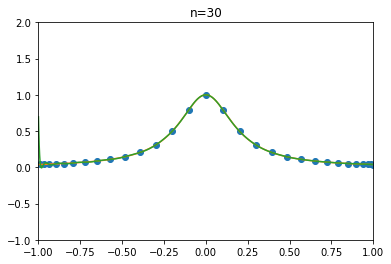

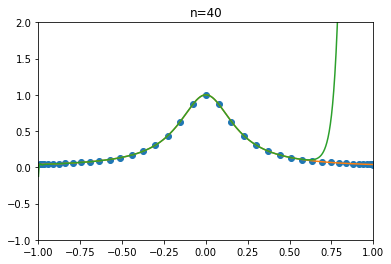

In [0]:
def plot_lagrange_with_cheb(n):
  i = int(n/2 -1)
  xs = [np.cos(((2*i +1)*np.pi)/(2*n+2)) for i in range(0,n)]
  m=n*100
  xs_fine = [np.cos(((2*i +1)*np.pi)/(2*m+2)) for i in range(0,m)]
  cheb_ys = [homeworkFunc(x) for x in xs]
  poly = lagrange(xs,cheb_ys)
  coef = Polynomial(poly).coef
  lagrange_ys = np.polyval(coef,xs_fine)

  plot.plot(xs, cheb_ys, 'o')
  plot.plot(xss_fine[i], yss_fine[i])
  plot.plot(xs_fine, lagrange_ys)
  plot.axis([-1, 1, -1, 2])
  plot.title("n={}".format(n))
  plot.show()
  
plot_lagrange_with_cheb(6)
plot_lagrange_with_cheb(10)
plot_lagrange_with_cheb(20)
plot_lagrange_with_cheb(30)
plot_lagrange_with_cheb(40)

Using chebychev points greatly increases the accuracy of the interpolated function. However, I am still getting strange values when n is very large. This could have something to do with scipy's lagrange function.

In [0]:
def plot_func_with_lagrange_and_cheb(n, func,showPlot=False):
  i = int(n/2 -1)
  xs = [np.cos(((2*i +1)*np.pi)/(2*n+2)) for i in range(0,n+1)]
  m=n*100
  xs_fine = [np.cos(((2*i +1)*np.pi)/(2*m+2)) for i in range(0,m+1)]
  ys_fine = [func(x) for x in xs_fine]
  cheb_ys = [func(x) for x in xs]
  poly = lagrange(xs,cheb_ys)
  coef = Polynomial(poly).coef
  lagrange_ys = np.polyval(coef,xs_fine)
  if showPlot:
    plot.plot(xs, cheb_ys, 'o')
    plot.plot(xs_fine, ys_fine)
    plot.plot(xs_fine, lagrange_ys)
    plot.axis([-1, 1, -1, 2])
    plot.title("n={}".format(n))
    plot.show()
  return(max(abs(ys_fine-lagrange_ys)))
  


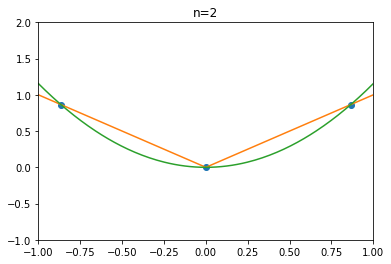

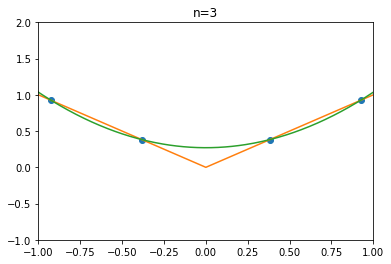

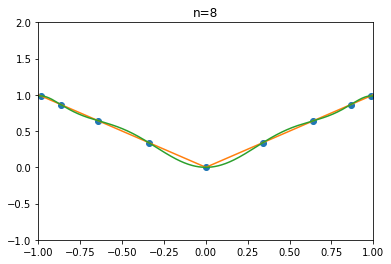

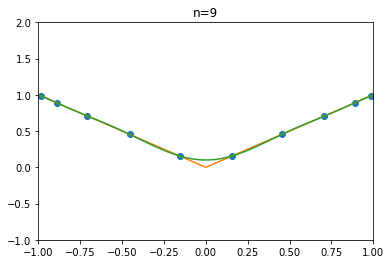

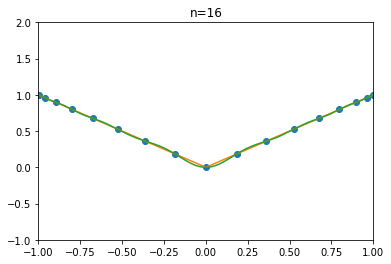

0.03520973576947764

In [0]:
plot_func_with_lagrange_and_cheb(2,abs, True)
plot_func_with_lagrange_and_cheb(3,abs, True)
plot_func_with_lagrange_and_cheb(8,abs, True)
plot_func_with_lagrange_and_cheb(9,abs, True)
plot_func_with_lagrange_and_cheb(16,abs,True)

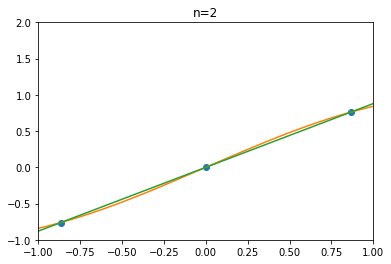

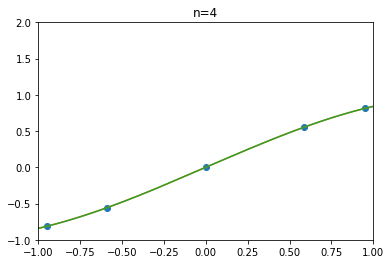

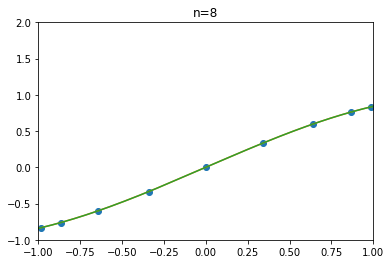

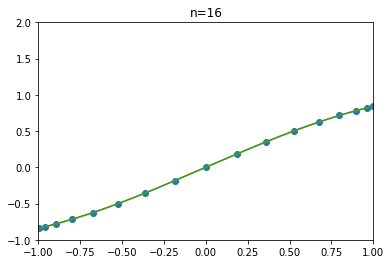

2.5505975109751944e-10

In [0]:
plot_func_with_lagrange_and_cheb(2,np.sin,True)



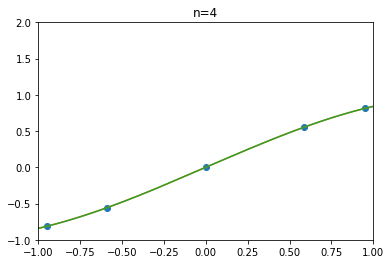

0.0005043852839628493

In [0]:
plot_func_with_lagrange_and_cheb(4,np.sin,True)


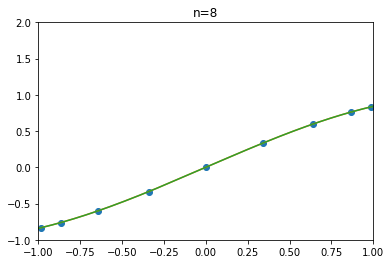

1.0542012152114921e-08

In [0]:
plot_func_with_lagrange_and_cheb(8,np.sin,True)


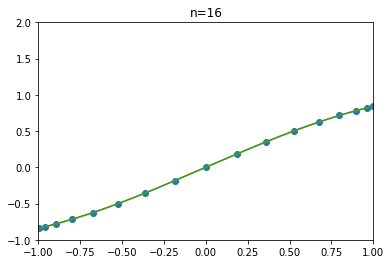

2.5505975109751944e-10

In [0]:
plot_func_with_lagrange_and_cheb(16,np.sin,True)

In [0]:
def tabulate_err(n, func):
  table = [[i , plot_func_with_lagrange_and_cheb(i,func)] for i in range(1,n+1)]
  print("Max Error Values for the function:", func.__name__)
  print(tabulate(table, headers = ["n", "Max Error"]))
  
tabulate_err(16,abs)
tabulate_err(16,np.sin)

Max Error Values for the function: abs
  n    Max Error
---  -----------
  1    0.707107
  2    0.216479
  3    0.270598
  4    0.123175
  5    0.172546
  6    0.0866566
  7    0.127449
  8    0.066974
  9    0.101247
 10    0.0546219
 11    0.0840524
 12    0.0461286
 13    0.0718805
 14    0.0399346
 15    0.0628024
 16    0.0352097
Max Error Values for the function: sin
  n    Max Error
---  -----------
  1  0.0772086
  2  0.0396259
  3  0.000992813
  4  0.000504385
  5  5.98727e-06
  6  3.02358e-06
  7  2.09457e-08
  8  1.0542e-08
  9  4.78534e-11
 10  2.41204e-11
 11  2.28417e-12
 12  3.70648e-12
 13  2.06067e-11
 14  4.687e-11
 15  2.77353e-10
 16  2.5506e-10


-0.992708874098054

For the absolute value function, the error seems to oscilate, but overall converges to zero. Odd numbers for n aren't quite as accurate as the even numbers. This likely has to do with the shape of different order monomial functions. Functions with an even order (Ex: x^2, x^4) tend to have a "U" shape, while functions of an odd order (Ex: x^3) have the shape of a sideways "S". Since the absolute value function has more of a "U" shape and functions are most significantly affected by their highest order term, we get better results for an even value for n.


For the sin function, the error converges, but then starts to diverge. 